<a href="https://colab.research.google.com/github/signife/VentureStartUp/blob/main/04_25_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd



In [ ]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2, shuffle = True, random_state = 34, stratify = data.target)


In [ ]:
df_cancer = pd.DataFrame(data.data, columns = data.feature_names)
df_cancer['target'] = data.target
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X_test.shape

(114, 30)

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits = 5, shuffle = True)



<generator object _BaseKFold.split at 0x7ce980223a70>


In [ ]:
# @title 구현 방식
from sklearn.model_selection import KFold

cv = KFold(n_splits = 5, shuffle = True)

max_depth = X_test.shape[1]
avg_acc = []


for depth in range(1,max_depth):
    model = RandomForestClassifier(max_depth = depth)

    fold_acc = []

    for train_fold, valid_fold in cv.split(df_cancer):
        f_train = df_cancer.loc[train_fold]
        f_valid = df_cancer.loc[valid_fold]

        rf_model = model.fit(f_train.iloc[:,:-1],f_train.iloc[:,-1])
        rf_score = rf_model.score(f_valid.iloc[:,:-1], f_valid.iloc[:,-1])
        fold_acc.append(rf_score)

    avg_acc.append(sum(fold_acc)/len(fold_acc))

In [ ]:
max(avg_acc)

0.9648812296227295

In [ ]:
avg_acc.index(max(avg_acc))

23

In [ ]:
# @title 실전
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state = 34)

parameters = {'n_estimators':[3,4,5,6,7,8],'max_depth':range(1,30),
              'min_samples_split':[3,4,5]
              }

rf_grid = GridSearchCV(rf_model, param_grid = parameters, cv = 5)

In [ ]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=34),
             param_grid={'max_depth': range(1, 30),
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [3, 4, 5, 6, 7, 8]})

In [ ]:
rf_grid.cv_results_

{'mean_fit_time': array([0.0107038 , 0.01254258, 0.0155077 , 0.0186307 , 0.02462916,
        0.02408996, 0.01317172, 0.01348681, 0.01557369, 0.01885114,
        0.02439094, 0.02449312, 0.01110077, 0.01259561, 0.01538219,
        0.01831093, 0.02742033, 0.02451706, 0.01114168, 0.00807071,
        0.00939469, 0.01180801, 0.01312418, 0.01446524, 0.00670156,
        0.00840526, 0.00956173, 0.01196742, 0.01397824, 0.01503925,
        0.00644512, 0.00991788, 0.01015148, 0.0113111 , 0.01551824,
        0.02382059, 0.01155577, 0.01341252, 0.01677403, 0.01893444,
        0.02081661, 0.0258409 , 0.01156654, 0.01243043, 0.01546679,
        0.01864858, 0.02191992, 0.02488928, 0.01060562, 0.01287403,
        0.01650062, 0.01909351, 0.02305231, 0.02899985, 0.01129665,
        0.01323252, 0.01804037, 0.02062821, 0.02309418, 0.01599851,
        0.00670033, 0.00857501, 0.01102877, 0.01257691, 0.01508369,
        0.01806684, 0.00678988, 0.00850406, 0.01043549, 0.01297817,
        0.01471348, 0.01591558,

In [ ]:
result = pd.DataFrame(rf_grid.cv_results_['params'])
result['mean_test_score'] = rf_grid.cv_results_['mean_test_score']
result

,max_depth,min_samples_split,n_estimators,mean_test_score
0,1,3,3,0.934066
1,1,3,4,0.931868
2,1,3,5,0.923077
3,1,3,6,0.923077
4,1,3,7,0.938462
...,...,...,...,...
517,29,5,4,0.947253
518,29,5,5,0.958242
519,29,5,6,0.958242
520,29,5,7,0.960440


In [ ]:
result.sort_values('mean_test_score', ascending = False)

,max_depth,min_samples_split,n_estimators,mean_test_score
107,6,5,8,0.967033
110,7,3,5,0.964835
434,25,3,5,0.964835
272,16,3,5,0.964835
488,28,3,5,0.964835
...,...,...,...,...
8,1,4,5,0.923077
14,1,5,5,0.923077
15,1,5,6,0.923077
3,1,3,6,0.923077


In [ ]:
rf_grid.best_estimator_.feature_importances_

array([0.08289953, 0.01603587, 0.01985946, 0.        , 0.00671666,
       0.00290052, 0.09098127, 0.13677536, 0.        , 0.00927317,
       0.00642445, 0.00400153, 0.00979709, 0.0101533 , 0.00091556,
       0.00203345, 0.00479074, 0.00212177, 0.00323504, 0.00109296,
       0.01544691, 0.01590061, 0.03493488, 0.09739104, 0.001892  ,
       0.00746288, 0.0260017 , 0.37929339, 0.00964644, 0.00202243])

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_split=5, n_estimators=8,
                       random_state=34)

In [ ]:
import joblib

joblib.dump(rf_grid.best_estimator_,'cancer_model.joblib')

['cancer_model.joblib']

In [ ]:
cancer_model = joblib.load('cancer_model.joblib')
cancer_model.predict(X_test)

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1])

Feature 중요도:  [0.083 0.016 0.02  0.    0.007 0.003 0.091 0.137 0.    0.009 0.006 0.004
 0.01  0.01  0.001 0.002 0.005 0.002 0.003 0.001 0.015 0.016 0.035 0.097
 0.002 0.007 0.026 0.379 0.01  0.002]
mean radius 0.083
mean texture 0.016
mean perimeter 0.02
mean area 0.0
mean smoothness 0.007
mean compactness 0.003
mean concavity 0.091
mean concave points 0.137
mean symmetry 0.0
mean fractal dimension 0.009
radius error 0.006
texture error 0.004
perimeter error 0.01
area error 0.01
smoothness error 0.001
compactness error 0.002
concavity error 0.005
concave points error 0.002
symmetry error 0.003
fractal dimension error 0.001
worst radius 0.015
worst texture 0.016
worst perimeter 0.035
worst area 0.097
worst smoothness 0.002
worst compactness 0.007
worst concavity 0.026
worst concave points 0.379
worst symmetry 0.01
worst fractal dimension 0.002


<Axes: >

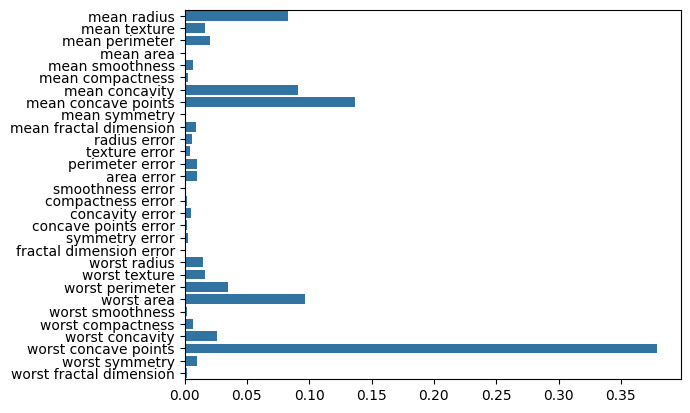

In [ ]:
import seaborn as sns
import numpy as np

print('Feature 중요도: ' ,np.round(rf_grid.best_estimator_.feature_importances_, 3 ))

feature_value = np.round(rf_grid.best_estimator_.feature_importances_, 3 )

for name, value in zip(data.feature_names, feature_value):
    print(name, value)

sns.barplot(x = feature_value, y = data.feature_names)